In [1]:
from keras.datasets import reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 10000)

Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(y_train.shape)

(8982,)
(8982,)


In [3]:
print(y_train)

[ 3  4  3 ... 25  3 25]


In [4]:
from keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [5]:
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 2000)
x_test shape: (2246, 2000)


In [7]:
print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [8]:
#C:\Users\segar\Desktop\glove.6B
import os
import numpy as np
glove_dir = 'C:\\Users\\segar\\Desktop\\glove.6B'
embedding_index = {}
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype = 'float32')
    embedding_index[word] = coefs
f.close()


In [9]:
print(len(embedding_index))

400000


In [10]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 10000)
word_index = tokenizer.word_index

In [11]:
embedding_dim = 100
max_words = 10000
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [20]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Dropout
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = 2000))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(46, activation = 'sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 2000, 100)         1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 200000)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               102400512 
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 46)                23598     
Total params: 103,424,110
Trainable params: 103,424,110
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [22]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [23]:
history = model.fit(x_train,Y_train,epochs = 10, batch_size = 32, validation_split=0.1)


Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 221s 27ms/step - loss: 0.6320 - acc: 0.9783 - val_loss: 0.5771 - val_acc: 0.9783
Epoch 2/10
8083/8083 [==============================] - 168s 21ms/step - loss: 0.5280 - acc: 0.9783 - val_loss: 0.4809 - val_acc: 0.9783
Epoch 3/10
8083/8083 [==============================] - 169s 21ms/step - loss: 0.4392 - acc: 0.9783 - val_loss: 0.3995 - val_acc: 0.9783
Epoch 4/10
8083/8083 [==============================] - 168s 21ms/step - loss: 0.3645 - acc: 0.9783 - val_loss: 0.3315 - val_acc: 0.9783
Epoch 5/10
8083/8083 [==============================] - 170s 21ms/step - loss: 0.3025 - acc: 0.9783 - val_loss: 0.2756 - val_acc: 0.9783
Epoch 6/10
8083/8083 [==============================] - 178s 22ms/step - loss: 0.2519 - acc: 0.9783 - val_loss: 0.2302 - val_acc: 0.9783
Epoch 7/10
8083/8083 [==============================] - 179s 22ms/step - loss: 0.2109 - acc: 0.9783 - val_loss: 0.1938 - val_acc: 

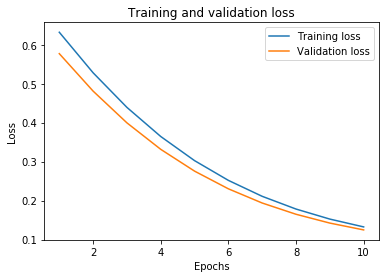

In [27]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

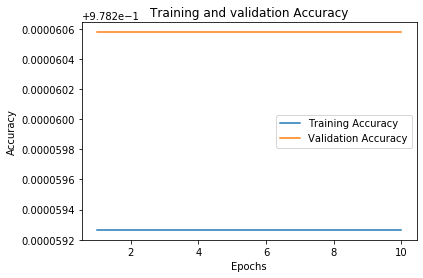

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
result =model.evaluate(x_test,Y_test)
print(result)

2246/2246 [==============================] - 3s 1ms/step
[0.12384231522586446, 0.9782605171203613]
